In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()


## Example

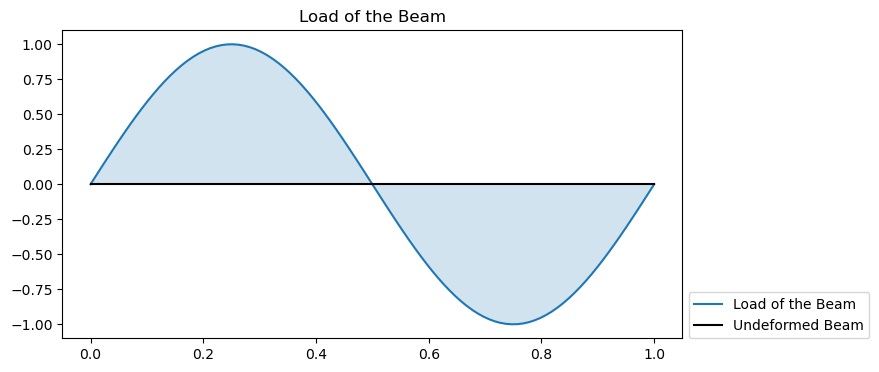

In [2]:
X = np.linspace(0, 1, 100)
F = np.sin(2*np.pi*X) #sym.lambdify(x, f, 'numpy')

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Load of the Beam')
ax.plot(X, F, 'C0', label='Load of the Beam');
ax.plot(np.linspace(0, 1, 100), np.zeros(100), 'k-', label='Undeformed Beam');
ax.fill_between(X, F, alpha=0.2);
ax.legend(loc=(1.01, 0));

$$\frac{d^4 u }{d x^4} = f(x)$$
For 4th derivative we need 4 neighbouring points to get the 2nd order approximation. Taylor series with the 5th derivative as well.

$$u_{j+2} = u_j + 2h \cdot u_j' + \frac{1}{2} \cdot 4h^2 u_j'' + \frac{1}{6} \cdot 8h^3 u_j''' + \frac{1}{24} \cdot 16h^4 u_j'''' + \frac{1}{120} \cdot 32h^5 u_j''''' +  O(h^6)$$

$$u_{j+1} = u_j + h \cdot u_j' + \frac{1}{2} \cdot h^2 u_j'' + \frac{1}{6} \cdot h^3 u_j''' + \frac{1}{24} \cdot h^4 u_j'''' + \frac{1}{120} \cdot h^5 u_j''''' +  O(h^6)$$

$$u_{j-1} = u_j - h \cdot u_j' + \frac{1}{2} \cdot h^2 u_j'' - \frac{1}{6} \cdot h^3 u_j''' + \frac{1}{24} \cdot h^4 u_j'''' - \frac{1}{120} \cdot 32h^5 u_j''''' +  O(h^6)$$

$$u_{j-2} = u_j - 2h \cdot u_j' + \frac{1}{2} \cdot 4h^2 u_j'' - \frac{1}{6} \cdot 8h^3 u_j''' + \frac{1}{24} \cdot 16h^4 u_j'''' - \frac{1}{120} \cdot 32h^5 u_j''''' +  O(h^6)$$

Multiply each equation with $\alpha$, $\beta$, $\gamma$, $\delta$:

$$\alpha \cdot u_{j+2}$$
$$\beta \cdot u_{j+1}$$
$$\gamma \cdot u_{j-1}$$
$$\delta \cdot u_{j-2}$$

Sum the result:

$$\alpha \cdot u_{j+2} + \beta \cdot u_{j+1} + \gamma \cdot u_{j-1} + \delta \cdot u_{j-2} = $$
$$(\alpha + \beta + \gamma + \delta) \cdot u_j + $$
$$ h \cdot (2\alpha + \beta - \gamma - 2 \delta) \cdot u_j' + $$
$$ \frac{h^2}{2} \cdot (4\alpha + \beta + \gamma + 4 \delta) \cdot u_j'' + $$
$$ \frac{h^3}{6} \cdot (8\alpha + \beta - \gamma - 8 \delta) \cdot u_j''' + $$
$$ \frac{h^4}{24} \cdot (16\alpha + \beta + \gamma + 16 \delta) \cdot u_j'''' + $$
$$ \frac{h^5}{120} \cdot (32\alpha + \beta - \gamma - 32 \delta) \cdot u_j'''' + $$
$$\mathcal{O}\left(h^{6}\right)$$

We dont worry about this one:
$$(\alpha + \beta + \gamma + \delta) \cdot u_j \rightarrow (\alpha + \beta + \gamma + \delta)$$
These must be 0:
$$ h \cdot (2\alpha + \beta - \gamma - 2 \delta) \cdot u_j' = 0 $$
$$ \frac{h^2}{2} \cdot (4\alpha + \beta + \gamma + 4 \delta) \cdot u_j'' = 0 $$
$$ \frac{h^3}{6} \cdot (8\alpha + \beta - \gamma - 8 \delta) \cdot u_j''' = 0 $$
We are looking for thisone therefore it musst be = 1:
$$ \frac{h^4}{24} \cdot (16\alpha + \beta + \gamma + 16 \delta) \cdot u_j'''' = 1$$
This one we don't worry about:
$$ \frac{h^5}{120} \cdot (32\alpha + \beta - \gamma - 32 \delta) \cdot u_j'''''$$

Boundary conditions:
$$u(x=0)=0$$
$$u(x=1)=0$$
$$\frac{du}{dx} (x=0)=0$$
$$\frac{du}{dx} (x=1)=0$$

We calculate:
$$\alpha = \delta = \frac{1}{h^4}$$
$$\beta = \gamma = -\frac{1}{h^4}$$
And we get the final result:
$$u_j'''' = \frac{1}{h^4} (u_{j+2} - 4u_{j+1} + 6u_{j} -4u_{j-1} + u_{j-2}) + \mathcal{O}\left(h^{2}\right)$$

In the first and last point the solution is known from boundary condition. The second point from each end follows the approximation with the help of the second boundary condition:
On the left (in point $u_2$) from the boundary condition we get $$u_0 = u_2$$
On the right (in point $u_{N-1}$) we get $$u_{N-1} = u_{N+1}$$

After all of the above we end up with a set of algebraic equations. We can write them all at once:
$$\mathbf{A} \cdot \mathbf{u} = \mathbf{f}$$

N_ex = 513
N_ex/2 = 257.0
N_ex/4 = 129.0


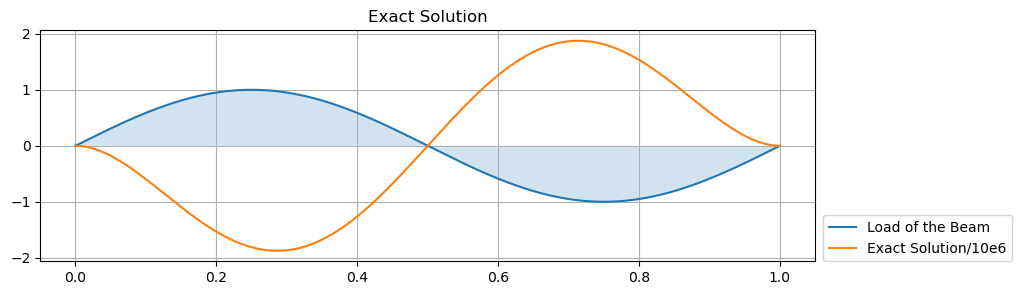

In [3]:
## "exact" solution 
N_ex = 257*2 -1
x_ex = np.linspace(0, 1, N_ex)
u_ex = np.zeros(N_ex)

h_ex = 1 / (N_ex - 1)
A_ex = np.zeros((N_ex, N_ex))
A_ex[0, 0] = 1
A_ex[-1, -1] = 1
for i in range(2, N_ex - 2):
    A_ex[i, i-2:i+3] = [1, -4, 6, -4, 1]
for i in [2]:
    A_ex[1, i - 2:i + 3] = [-4, 7, -4, 1, 0]
    A_ex[-2, -5:] = [0, 1, -4, 7, -4]


f_ex = np.zeros(N_ex)
for i in range(len(f_ex)):
    f_ex[i] = np.sin(2 * np.pi * i * h_ex) 

u_ex = np.linalg.solve(A_ex, -f_ex)
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(x_ex, f_ex, 'C0', label='Load of the Beam');
ax.fill_between(x_ex, f_ex, alpha=0.2);
ax.plot(x_ex, u_ex/10e6, 'C1', label='Exact Solution/10e6');
ax.grid()
ax.legend(loc=(1.01, 0));
ax.set_title('Exact Solution');

print(f'N_ex = {N_ex}')
print(f'N_ex/2 = {(N_ex+1)/2}')
print(f'N_ex/4 = {((N_ex+1)/2+1)/2}')

In [4]:
print(len(u_ex[::2])) #1
print(len(u_ex[::4])) #2
print(len(u_ex[::8])) #3
print(len(u_ex[::16]))#4
print(len(u_ex[::32]))#5

257
129
65
33
17


## single output

[ 0.00000000e+00  3.82683432e-01  7.07106781e-01  9.23879533e-01
  1.00000000e+00  9.23879533e-01  7.07106781e-01  3.82683432e-01
  1.22464680e-16 -3.82683432e-01 -7.07106781e-01 -9.23879533e-01
 -1.00000000e+00 -9.23879533e-01 -7.07106781e-01 -3.82683432e-01
 -2.44929360e-16]


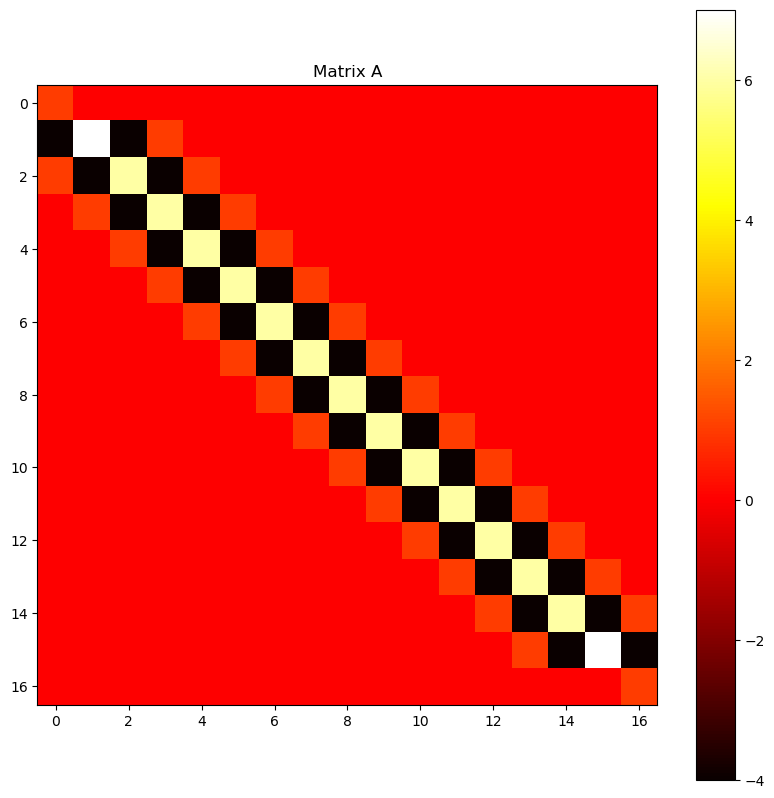

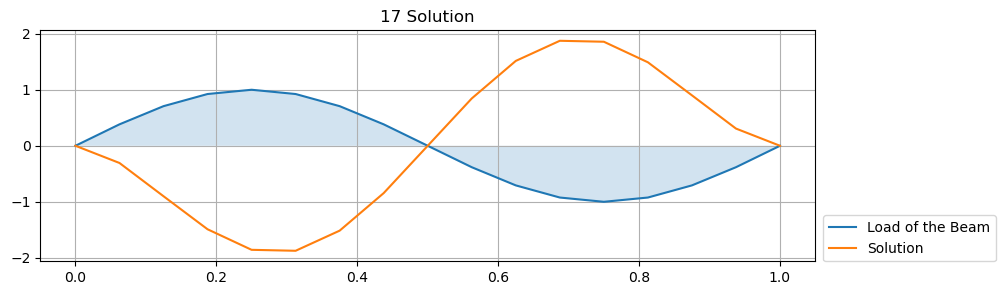

In [5]:
## 17
N_17 = 17
x_17 = np.linspace(0, 1, N_17)
u_17 = np.zeros(N_17)

h_17 = 1 / (N_17 - 1)
A_17 = np.zeros((N_17, N_17))
A_17[0, 0] = 1
A_17[-1, -1] = 1
for i in range(2, N_17 - 2):
    A_17[i, i-2:i+3] = [1, -4, 6, -4, 1]
for i in [2]:
    A_17[1, i - 2:i + 3] = [-4, 7, -4, 1, 0]
    A_17[-2, -5:] = [0, 1, -4, 7, -4]


f_17 = np.zeros(N_17)
for i in range(len(f_17)):
    f_17[i] = np.sin(2 * np.pi * i * h_17) 

print(f_17)
u_17 = np.linalg.solve(A_17, -f_17)
## PLot matri A with colors
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(A_17, cmap='hot')
im = ax.imshow(A_17, cmap='hot')
ax.set_title('Matrix A');
fig.colorbar(im, ax=ax)


fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(x_17, f_17, 'C0', label='Load of the Beam');
ax.fill_between(x_17, f_17, alpha=0.2);
ax.plot(x_17, u_17/10, 'C1', label='Solution');
ax.grid()
ax.legend(loc=(1.01, 0));
ax.set_title('17 Solution');

N_33 = 33
N_33/2 = 17.0
N_33/4 = 9.0


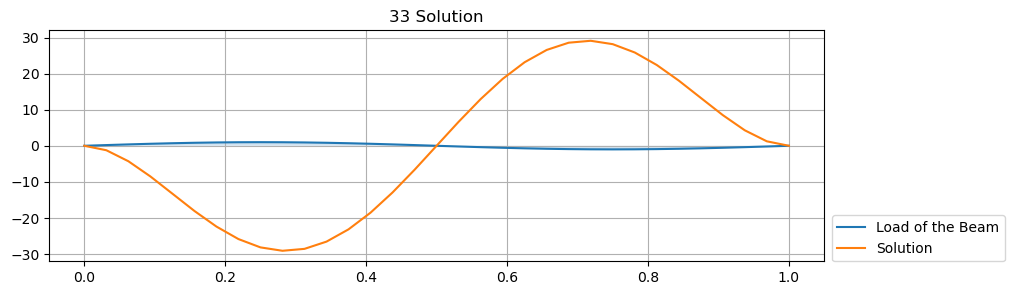

In [6]:
## 33
N_33 = 33
x_33 = np.linspace(0, 1, N_33)
u_33 = np.zeros(N_33)

h_33 = 1 / (N_33 - 1)
A_33 = np.zeros((N_33, N_33))
A_33[0, 0] = 1
A_33[-1, -1] = 1
for i in range(2, N_33 - 2):
    A_33[i, i-2:i+3] = [1, -4, 6, -4, 1]
for i in [2]:
    A_33[1, i - 2:i + 3] = [-4, 7, -4, 1, 0]
    A_33[-2, -5:] = [0, 1, -4, 7, -4]


f_33 = np.zeros(N_33)
for i in range(len(f_33)):
    f_33[i] = np.sin(2 * np.pi * i * h_33) 

u_33 = np.linalg.solve(A_33, -f_33)
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(x_33, f_33, 'C0', label='Load of the Beam');
ax.fill_between(x_33, f_33, alpha=0.2);
ax.plot(x_33, u_33/10, 'C1', label='Solution');
ax.grid()
ax.legend(loc=(1.01, 0));
ax.set_title('33 Solution');

print(f'N_33 = {N_33}')
print(f'N_33/2 = {(N_33+1)/2}')
print(f'N_33/4 = {((N_33+1)/2+1)/2}')

## options

In [7]:
options = [17, 33, 65, 129]

for idx, N in enumerate(options[:4]):
    print(f'idx = {idx}')
    print(2**(5-idx))
    

idx = 0
32
idx = 1
16
idx = 2
8
idx = 3
4


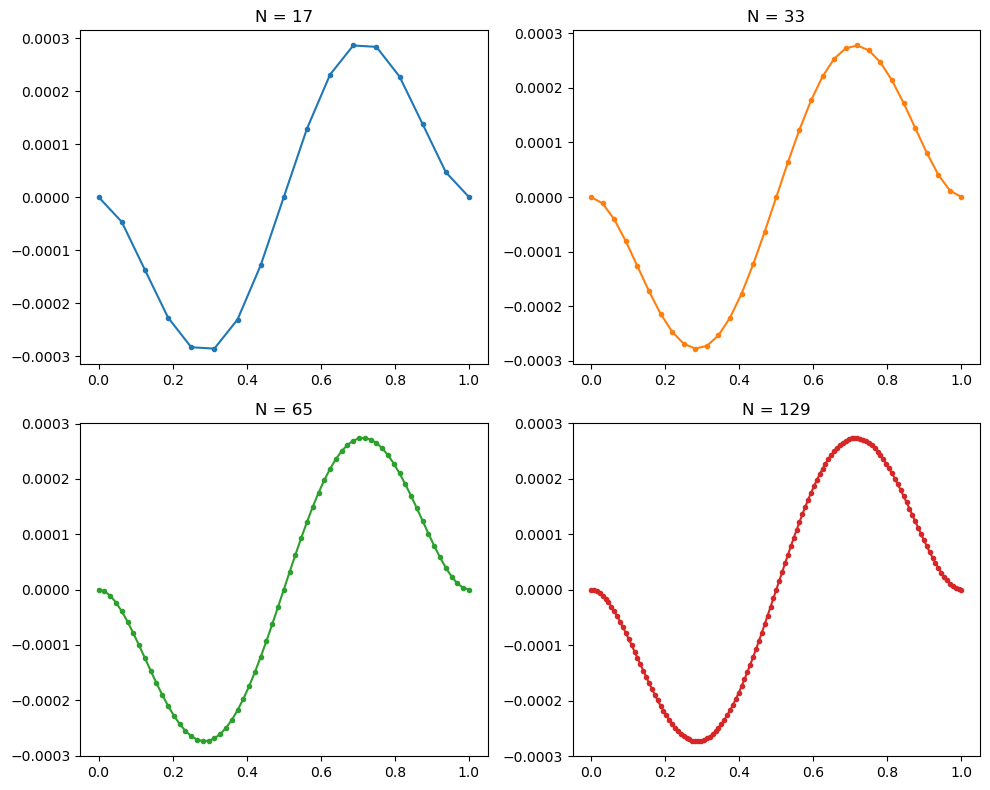

In [8]:
options = [17, 33, 65, 129]


fig, axs = plt.subplots(2, 2, figsize=(10, 8))

H = [0.0] * len(options)
for i in np.arange(len(H)):
    H[i] = 1 / (options[i] - 1)

R1 = H[1] / H[0]
R2 = H[2] / H[1]

## To compare the solutions
u_p1 = np.zeros((3, options[0]))
u_p2 = np.zeros((3, options[1]))

## For L2 norm
L2 = []

for idx, N in enumerate(options[:4]):
    j = np.linspace(0, 1, N)
    load = np.sin(2 * np.pi * j)

    u = np.zeros_like(j)
    h = 1 / (N - 1)
    A = np.zeros((N, N))

    A[0, 0] = 1             # Boundary condition 1
    A[-1, -1] = 1           # Boundary condition 2
    
    ## MIddle part of A
    for i in range(2, N - 2):
        A[i, i-2:i+3] = [1, -4, 6, -4, 1]

    ## angle boundary condition
    for i in [2]:
        A[1, i - 2:i + 3] = [-4, 7, -4, 1, 0]   # second point from the left
        A[-2, -5:] = [0, 1, -4, 7, -4]          # second point from the right

    ## Applied force in selected points
    f = np.zeros_like(j)
    for i in range(len(f)):
        f[i] = load[i] * h ** 4

    ## Solve the system of algebraic equations
    u = np.linalg.solve(A, -f)

    # Plot 
    row = idx // 2
    col = idx % 2
    axs[row, col].plot(j, u, 'o-', color=f'C{idx}', ms=3)
    axs[row, col].set_title(f'N = {N}') 
    
    if idx ==0:                 # Store the solution for N = 17
        u_p1[0, :] = u
    elif idx ==1:               # Store the solution for N = 33
        u_p1[1, :] = u[::2]
        u_p2[0, :] = u
    elif idx ==2:               # Store the solution for N = 65
        u_p1[2, :] = u[::4]
        u_p2[1, :] = u[::2]
    elif idx ==3:               # Store the solution for N = 129
        u_p2[2, :] = u[::4] 

    
    ##L2
    L2.append(np.sqrt(1/(N-1) * np.sum((u - u_ex[::2**(5-idx)]) ** 2) )) #3 This five determines the lowest option

fig.tight_layout()
plt.show()


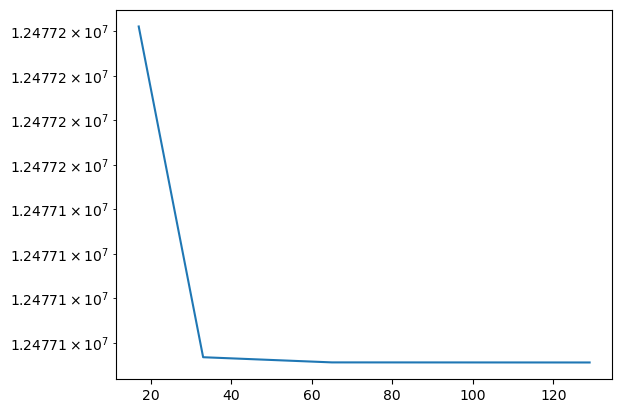

In [9]:
plt.plot(options, L2)
plt.yscale('log')

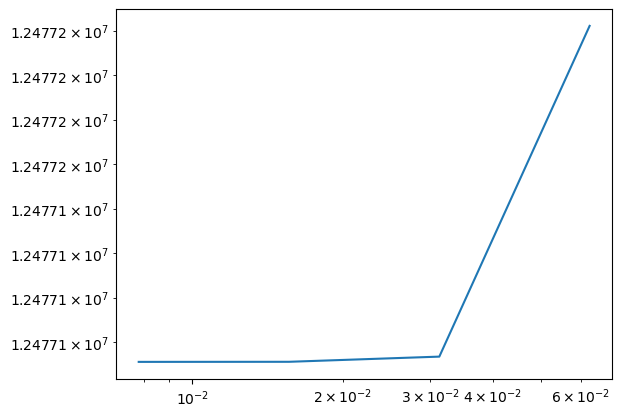

In [10]:
plt.plot(H[::-1], L2[::-1])
plt.xscale('log')
plt.yscale('log')
1/17

#### Comparison 16, 33, 65

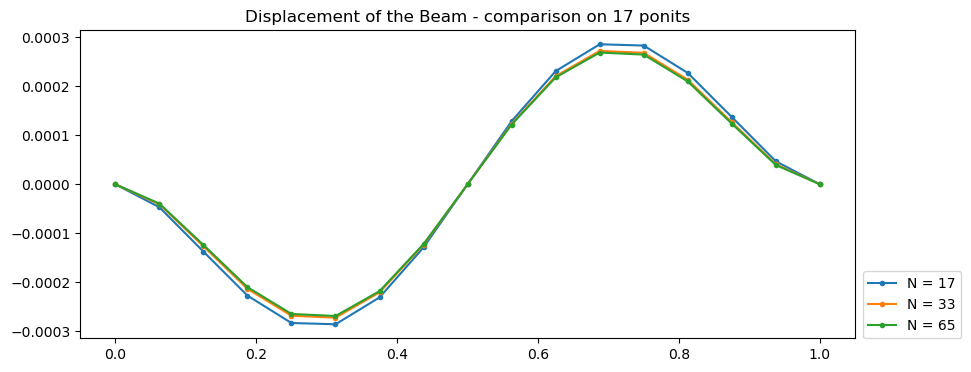

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))
for i in range(3):
    ax.plot(np.linspace(0, 1, options[0]), u_p1[i, :], 'o-', ms=3, label=f'N = {options[i]}')
ax.title.set_text('Displacement of the Beam - comparison on 17 ponits')
ax.legend(loc=(1.01, 0));

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
for i in range(3):
    ax.plot(np.linspace(0, 1, options[0]), u_p1[i, :], 'o-', ms=3, label=f'N = {options[i+1]}')
ax.title.set_text('Displacement of the Beam - comparison on 17 ponits')
ax.set_xlim(0.25, 0.35)
ax.legend(loc=(1.01, 0));

#### Comparison 33, 65, 129

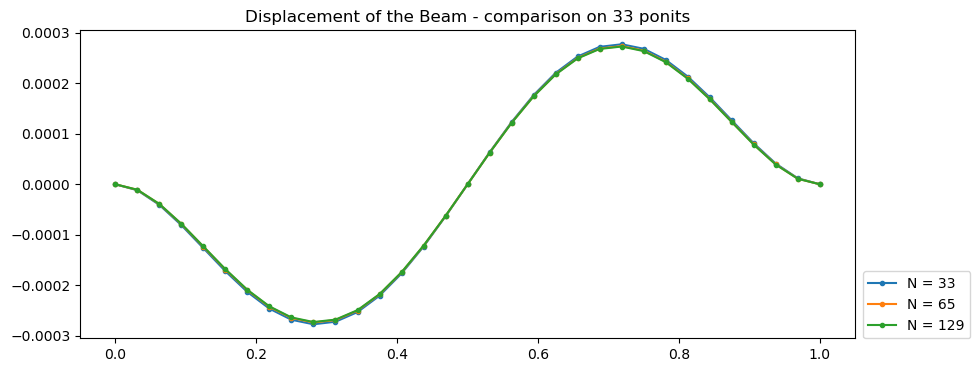

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
for i in range(3):
    ax.plot(np.linspace(0, 1, options[1]), u_p2[i, :], 'o-', ms=3, label=f'N = {options[i+1]}')
ax.title.set_text('Displacement of the Beam - comparison on 33 ponits')
ax.legend(loc=(1.01, 0));

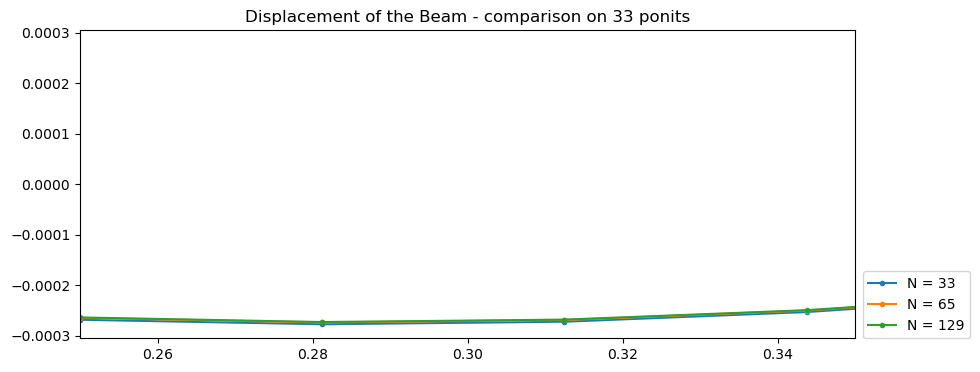

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))
for i in range(3):
    ax.plot(np.linspace(0, 1, options[1]), u_p2[i, :], 'o-', ms=3, label=f'N = {options[i+1]}')
ax.title.set_text('Displacement of the Beam - comparison on 33 ponits')
ax.set_xlim(0.25, 0.35)
ax.legend(loc=(1.01, 0));

#### P for first refinement

In [14]:
P1 = np.zeros(options[0])

C:\Users\marko\AppData\Local\Temp\ipykernel_23016\3449359443.py:3: RuntimeWarning: invalid value encountered in log
  P1[i] = np.log((u_p1[2, i] - u_p1[1, i]) / (u_p1[1, i] - u_p1[0, i])) / np.log(R1)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


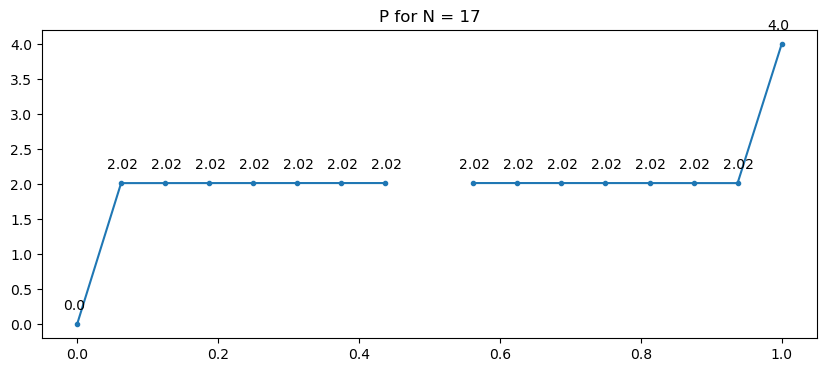

In [15]:
for i in np.arange(options[0]):
    if (u_p1[1, i] - u_p1[0, i]) != 0:
        P1[i] = np.log((u_p1[2, i] - u_p1[1, i]) / (u_p1[1, i] - u_p1[0, i])) / np.log(R1)
    elif (u_p1[1, i] - u_p1[0, i]) == 0:
        P1[i] = 0
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.linspace(0, 1, options[0]), P1, 'o-', ms=3, label=f'N = {options[0]}')
ax.set_title('P for N = 17')


for i in range(options[0]):
    ax.text(np.linspace(0, 1, options[0])[i] - 0.02, P1[i] + 0.2, str(round(P1[i], 2)))


#### P for second refinement

In [16]:
P2 = np.zeros(options[1])

C:\Users\marko\AppData\Local\Temp\ipykernel_23016\502875378.py:4: RuntimeWarning: divide by zero encountered in log
  P2[i] = np.log((u_p2[2, i] - u_p2[1, i]) / (u_p2[1, i] - u_p2[0, i])) / np.log(R2)


array([inf,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


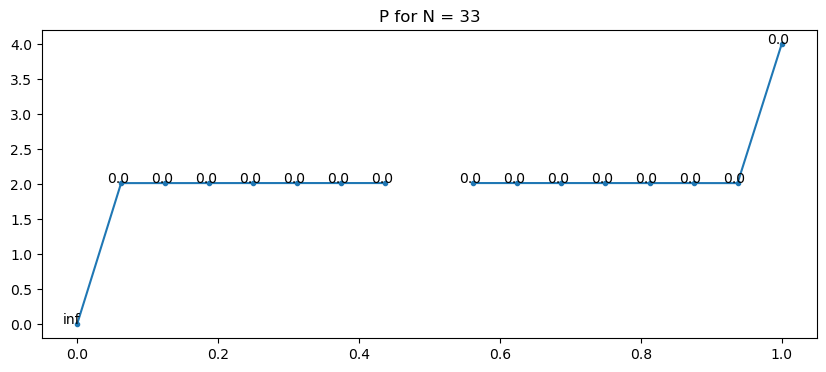

In [17]:
for i in np.arange(options[1]):
    if (u_p2[1, i] - u_p2[0, i]) != 0:
        if (u_p2[2, i] - u_p2[1, i]) ==0:
            P2[i] = np.log((u_p2[2, i] - u_p2[1, i]) / (u_p2[1, i] - u_p2[0, i])) / np.log(R2)
    elif (u_p2[1, i] - u_p2[0, i]) == 0:
        P2[i] = 0
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.linspace(0, 1, options[0]), P1, 'o-', ms=3, label=f'N = {options[0]}')
ax.set_title('P for N = 33')


for i in range(options[0]):
    ax.text(np.linspace(0, 1, options[0])[i] - 0.02, P1[i] + 0.0, str(round(P2[i], 2)))
P2


$$P = \frac{\ln \frac{u_{h3} - u_{h2}}{u_{h2} - u_{h1}}}{\ln(r)}$$

## $L_2$ norm

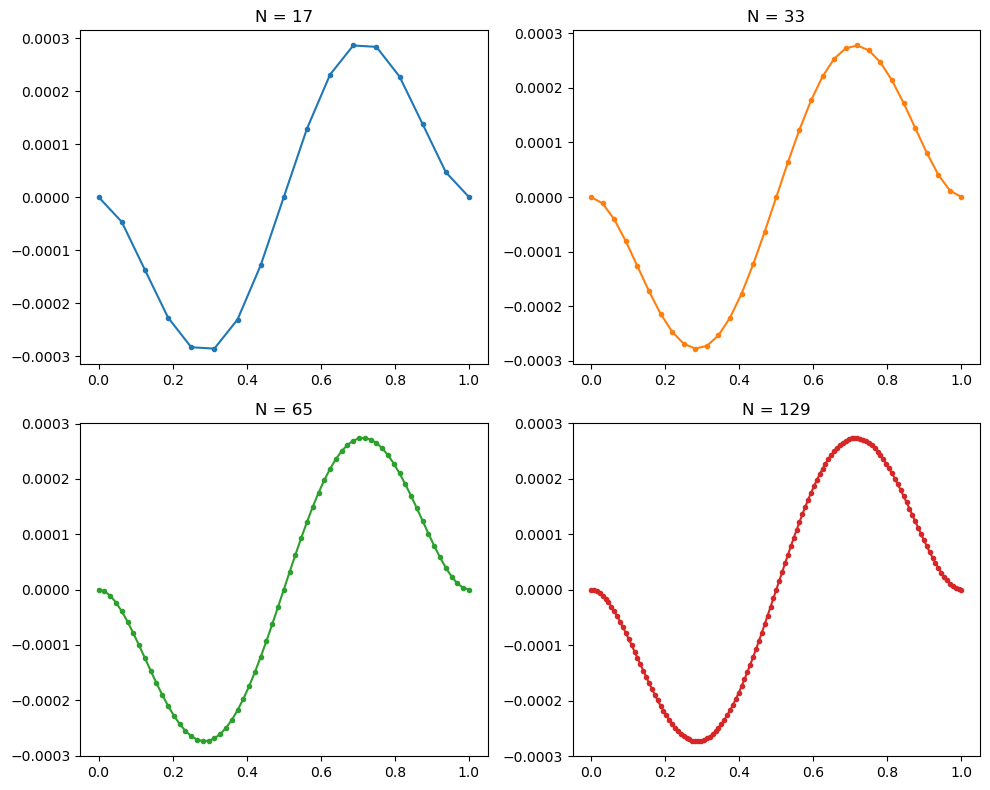

In [18]:
options = [17, 33, 65, 129, 247]


fig, axs = plt.subplots(2, 2, figsize=(10, 8))

H = [0.0] * len(options)
for i in np.arange(len(H)):
    H[i] = 1 / (options[i] - 1)

R1 = H[1] / H[0]
R2 = H[2] / H[1]

## To compare the solutions
u_p1 = np.zeros((3, options[0]))
u_p2 = np.zeros((3, options[1]))


for idx, N in enumerate(options[:4]):
    j = np.linspace(0, 1, N)
    load = np.sin(2 * np.pi * j)

    u = np.zeros_like(j)
    h = 1 / (N - 1)
    A = np.zeros((N, N))

    A[0, 0] = 1             # Boundary condition 1
    A[-1, -1] = 1           # Boundary condition 2
    
    ## MIddle part of A
    for i in range(2, N - 2):
        A[i, i-2:i+3] = [1, -4, 6, -4, 1]

    ## angle boundary condition
    for i in [2]:
        A[1, i - 2:i + 3] = [-4, 7, -4, 1, 0]   # second point from the left
        A[-2, -5:] = [0, 1, -4, 7, -4]          # second point from the right

    ## Applied force in selected points
    f = np.zeros_like(j)
    for i in range(len(f)):
        f[i] = load[i] * h ** 4

    ## Solve the system of algebraic equations
    u = np.linalg.solve(A, -f)

    # Plot 
    row = idx // 2
    col = idx % 2
    axs[row, col].plot(j, u, 'o-', color=f'C{idx}', ms=3)
    axs[row, col].set_title(f'N = {N}') 
    
    if idx ==0:                 # Store the solution for N = 17
        u_p1[0, :] = u
    elif idx ==1:               # Store the solution for N = 33
        u_p1[1, :] = u[::2]
        u_p2[0, :] = u
    elif idx ==2:               # Store the solution for N = 65
        u_p1[2, :] = u[::4]
        u_p2[1, :] = u[::2]
    elif idx ==3:               # Store the solution for N = 129
        u_p2[2, :] = u[::4] 


fig.tight_layout()
plt.show()


## Defining a function

In [19]:
def Euler_Bernouli(len, N, load):
    h = len/(N-1)
    # Create an empty vector of deformation
    u = np.zeros_like(j)
    
    # Create a matrix
    A = np.zeros((N, N))
    
    A[0, 0] = 1 ## Boundary condition (u(0) = 0)
    A[-1, -1] = 1 ## Boundary condition (u(1) = 0)
    for i in range(2, N-2):
        A[i, i-2:i+3] = [1, -4, 6, -4, 1] ## 2nd order derivative

    
    for i in [2]:
        A[i-1, i-2:i+3] = [-4, 7, -4, 1, 0]     ## 2nd boundary condition
        A[-2, -5:] = [0, 1, -4, 7, -4]          ## 2nd boundary condition
    print(A)

    f = np.zeros_like(j)
    for i in range(len(f)):
        f[i] = load[i]*h**4
    
    # Solve the equation
    u = np.linalg.solve(A, -f)
    
    return u